In [ ]:
# Importing libraries for easy data manipulation
import math
import os
import random
import pandas as pd
import numpy as np

# Importing scientific libraries
import scipy as scp
import astropy.constants as asc

# Importing libraries for data plotting
import matplotlib.pyplot as plt
from mpmath import *

In [ ]:
# Assigning frequency and time binning parameters
nv = 3072 #Number of voltage samples
n = 2**(10) #Number of time bins
dt = 1/(33000000) #Time Resolution of Frequency (1/33)MHz seconds

In [ ]:
volts = pd.read_csv('/content/drive/MyDrive/Ooty Data Analysis/ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace = True, header = None) #Importing data from drive
volts.columns = ['AN' , 'AS'] #Sorting out North Antenna and South Antenna Data
vl1 = volts.iloc[:,0]
vl2 = volts.iloc[:,1]

In [ ]:
#North Antenna
y1 = np.array(vl1.values.tolist()) #Voltage Data
p1 = np.square(y1) #Power Data: Sq of Voltages
vy1 = y1[0:nv] #Taking a subset out of complete dataset
py1 = np.square(vy1) #Power Data of subset
m1 = np.mean(y1) #Mean
s1 = np.std(y1) #Standard Deviation

#South Antenna
y2 = np.array(vl2.values.tolist()) #Voltage Data
p2 = np.square(y2) #Power Data: Sq of Voltages
vy2 = y2[0:nv] #Taking a subset out of complete dataset
py2 = np.square(vy2) #Power Data of subset
m2 = np.mean(y2) #Mean
s2 = np.std(y2) #Standard Deviation

#Time Array in seconds
x = np.zeros(nv) #Garbage Value
for i in range(nv):
  x[i] = (i/33000000) #Making time scale

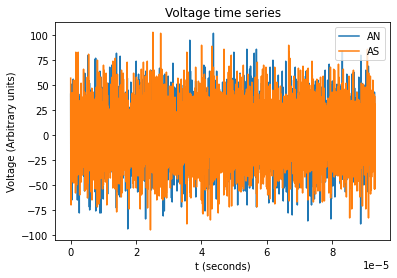

In [ ]:
#Plotting Voltage Series
plt.figure(0)
plt.plot(x,vy1, label='AN')
plt.plot(x,vy2, label='AS')
plt.xlabel('t (seconds)')
plt.ylabel('Voltage (Arbitrary units)')
plt.title('Voltage time series')
plt.legend()
plt.show()

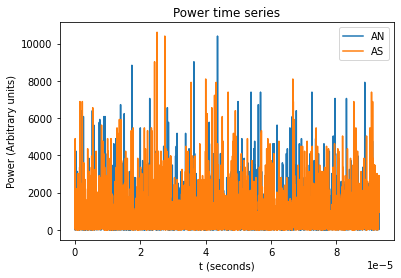

In [ ]:
#Plotting Power Series
plt.figure(1)
plt.plot(x,py1, label='AN')
plt.plot(x,py2, label='AS')
plt.xlabel('t (seconds)')
plt.ylabel('Power (Arbitrary units)')
plt.title('Power time series')
plt.legend()
plt.show()

In [ ]:
#North Antenna
y1 = y1 - m1 #Correction for offset

#South Antenna
y2 = y2 - m2 #Correction for offset

#Printing Mean and Standard Deviation Values
print("Mean for North Antenna:",m1)
print("Mean for South Antenna:",m2)
print("Standard deviation for North Antenna:",s1)
print("Standard deviation for South Antenna:",s2)

#Printing Corrected Values
print("Corrected y1:",y1)
print("Corrected y2:",y2)

Mean for North Antenna: 3.4847314552367616
Mean for South Antenna: 0.775094078970335
Standard deviation for North Antenna: 28.030350951657873
Standard deviation for South Antenna: 29.919543467732737
Corrected y1: [ 34.03053709 -34.96946291  -6.96946291 ... -37.96946291  -9.96946291
  61.03053709]
Corrected y2: [ 55.44981184 -40.55018816   9.44981184 ...  41.44981184  -4.55018816
 -37.55018816]


In [ ]:
#Applying Gausian and Exponential Fits
xv1 = np.linspace(-100,100, num = 100) #Generating Voltage Array
xv2 = np.linspace(0,1000, num = 100) #Generating Power Array
g1 = (np.exp((-(xv1)**2)/(2*(s1**2))))/(np.sqrt(2*np.pi)*s1) #Gaussian fit for North Antenna (Voltage)
g2 = (np.exp((-(xv1)**2)/(2*(s2**2))))/(np.sqrt(2*np.pi)*s2) #Gaussian fit for South Antenna (Voltage)
e1 = (np.exp((-(xv2))/(2*(s1**2))))/(np.sqrt(2*np.pi)*s1*(np.sqrt(xv2))) #Exponential fit for North Antenna (Power)
e2 = (np.exp((-(xv2))/(2*(s2**2))))/(np.sqrt(2*np.pi)*s2*(np.sqrt(xv2))) #Exponential fit for South Antenna (Power)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


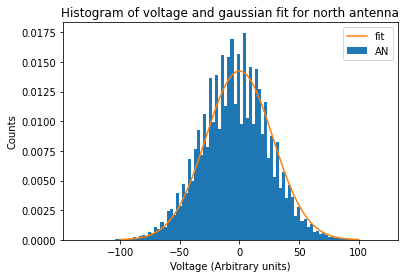

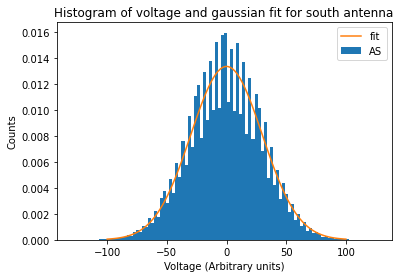

In [ ]:
#Voltage Histogram for North antenna
plt.figure(2)
plt.hist(y1,bins=100,density=1,label='AN')
plt.plot(xv1,g1,label='fit')
plt.title('Histogram of voltage and gaussian fit for north antenna')
plt.xlabel('Voltage (Arbitrary units)')
plt.ylabel('Counts')
plt.legend()
plt.show()

#Voltage Histogram for South antenna
plt.figure(3)
plt.hist(y2,bins=100,density=1,label='AS')
plt.plot(xv1,g2,label='fit')
plt.title('Histogram of voltage and gaussian fit for south antenna')
plt.xlabel('Voltage (Arbitrary units)')
plt.ylabel('Counts')
plt.legend()
plt.show()

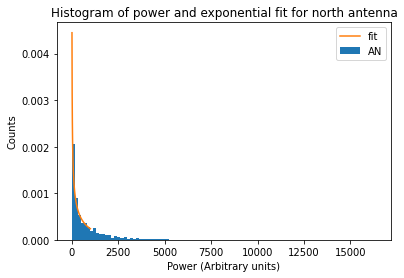

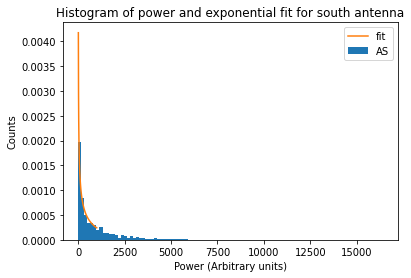

In [ ]:
#Power Histogram for North antenna
plt.figure(4)
plt.hist(p1,bins=100,density=1,label='AN')
plt.plot(xv2,e1,label='fit')
plt.title('Histogram of power and exponential fit for north antenna')
plt.xlabel('Power (Arbitrary units)')
plt.ylabel('Counts')
plt.legend()
plt.show()

#Power Histogram for South antenna
plt.figure(5)
plt.hist(p2,bins=100,density=1,label='AS')
plt.plot(xv2,e2,label='fit')
plt.title('Histogram of power and exponential fit for south antenna')
plt.xlabel('Power (Arbitrary units)')
plt.ylabel('Counts')
plt.legend()
plt.show()